# Old Cars

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold

**Uploading Dataset**

In [2]:
car_df = pd.read_csv('DS2_C5_S5_OldCars_Data_Challenge.csv')    

In [3]:
car_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
car_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
print(car_df['New_Price'].isnull().sum()/car_df.shape[0])

0.8612987729215497


In [7]:
car_df.isnull().mean()*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [8]:
# new_price ....86% missing so we can drop it 

In [9]:
print(car_df['Price'].isnull().sum()/car_df.shape[0])

0.1701364952433476


In [10]:
car_df.drop('New_Price',axis=1,inplace=True)

In [11]:
car_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [12]:
car_df[['Mileage','Engine','Power']] = car_df[['Mileage','Engine','Power']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [13]:
df=car_df

In [14]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [15]:
categorical_columns = ['Location','Fuel_Type','Transmission','Owner_Type']
df[categorical_columns] = df[categorical_columns].astype('category')

In [16]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

In [17]:
# add new column age
df['Age']=2023-df['Year']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7200 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Age                7253 non-null   int64   
dtypes: category(4), float64(5), int64(4), object(1)
memory usage: 596.0+ KB


In [19]:

df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,12
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,8
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,11
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,10


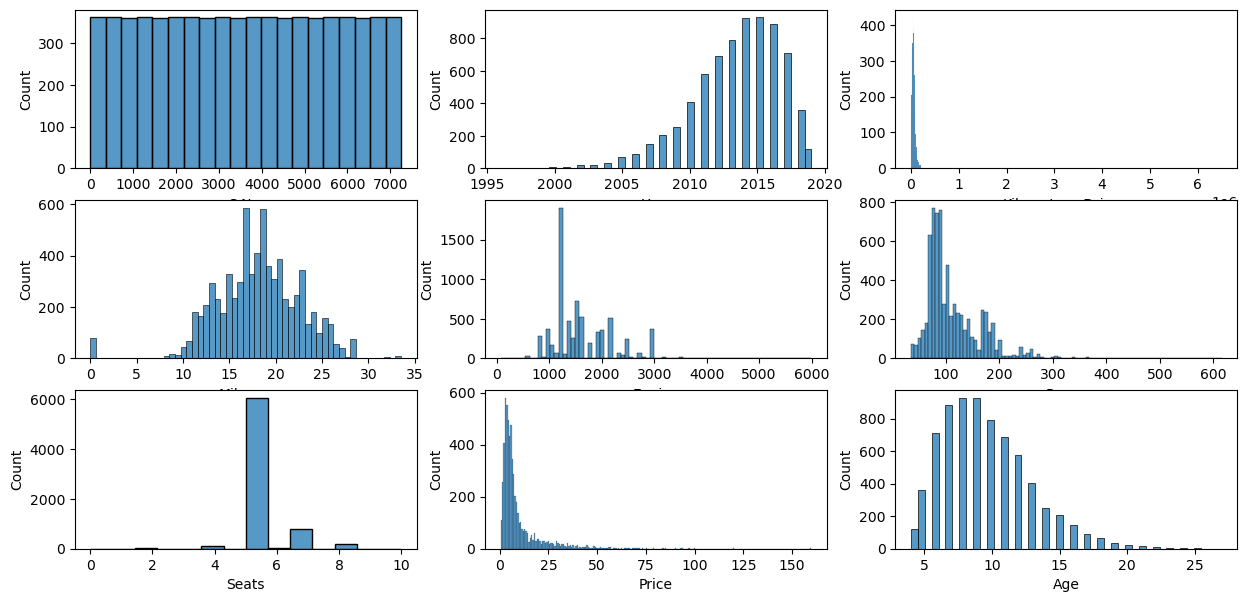

In [20]:
num_col = df.select_dtypes(["int64","float64"])

fig,axs=plt.subplots(3,3,figsize=(15,7))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=df,ax=axs[count])
    count+=1

In [21]:
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [22]:
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

In [23]:
df['Engine'].fillna(df['Engine'].median(),inplace=True)

In [24]:
df['Mileage'].fillna(df['Mileage'].median(),inplace=True)

In [25]:
df['Power'].fillna(df['Power'].median(),inplace=True)

In [26]:
# graph before the null treatment

In [27]:
# all the null values have been treated

In [28]:
df.duplicated().sum()

0

In [29]:
# no duplicates

In [30]:
df.drop('Year',axis=1,inplace=True)

In [31]:

# df.drop('S.No.',axis=1,inplace=True)

In [32]:
df

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.750000,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.500000,8
2,2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.500000,12
3,3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.000000,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.740000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,9.479468,12
7249,7249,Volkswagen Polo GT TSI,Mumbai,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,9.479468,8
7250,7250,Nissan Micra Diesel XV,Kolkata,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.479468,11
7251,7251,Volkswagen Polo GT TSI,Pune,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,9.479468,10


<AxesSubplot:xlabel='Mileage'>

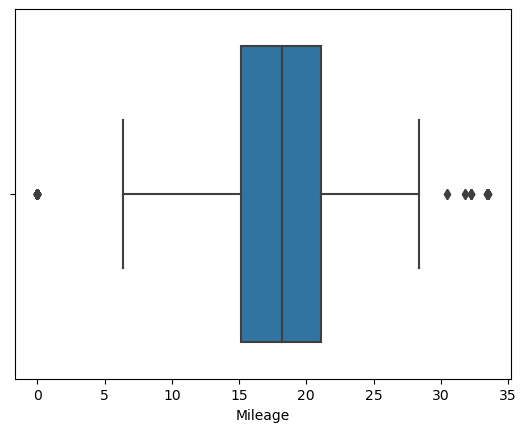

In [33]:
sns.boxplot('Mileage',data=df)

In [34]:
df=df[df.Mileage>5]

<AxesSubplot:xlabel='Mileage'>

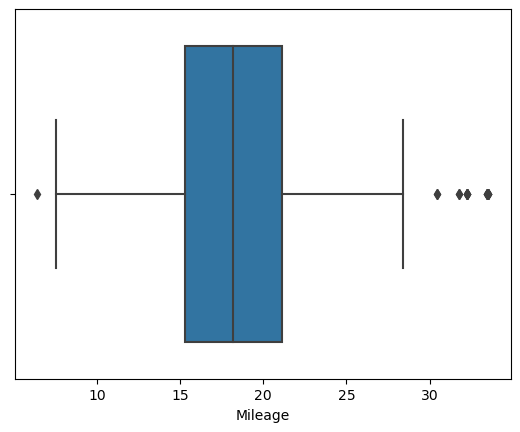

In [35]:
sns.boxplot('Mileage',data=df)

<AxesSubplot:xlabel='Engine'>

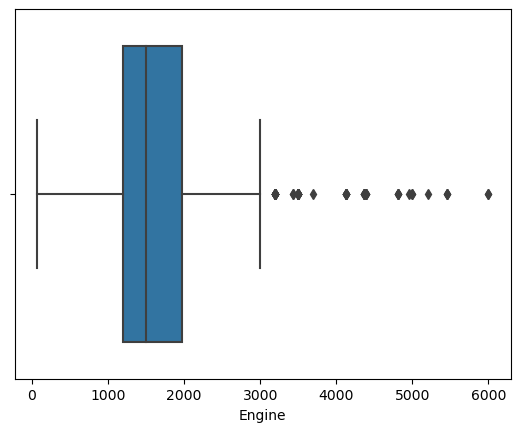

In [36]:
sns.boxplot('Engine',data=df)

<AxesSubplot:xlabel='Power'>

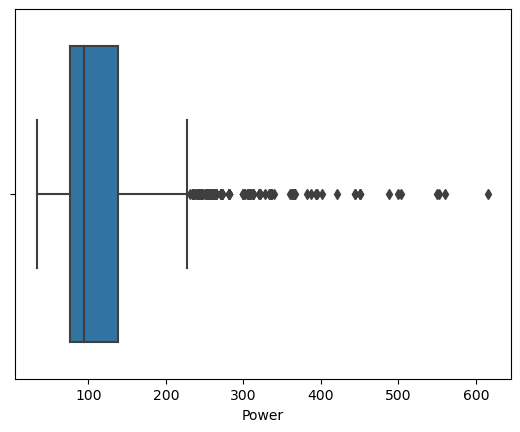

In [37]:
sns.boxplot('Power',data=df)

<AxesSubplot:xlabel='Price'>

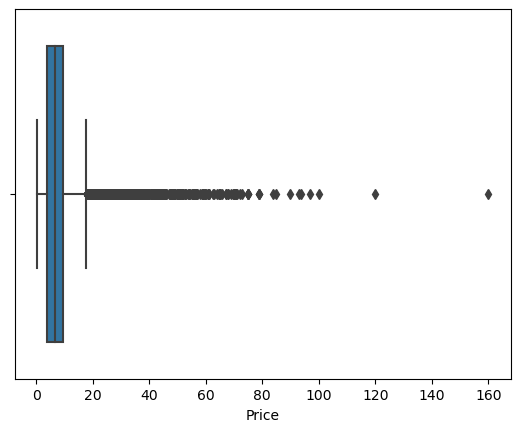

In [38]:
sns.boxplot('Price',data=df)

In [39]:
label_encoder =preprocessing.LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [40]:
df

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,0,Maruti Wagon R LXI CNG,9,72000,0,1,0,26.60,998.0,58.16,5.0,1.750000,13
1,1,Hyundai Creta 1.6 CRDi SX Option,10,41000,1,1,0,19.67,1582.0,126.20,5.0,12.500000,8
2,2,Honda Jazz V,2,46000,4,1,0,18.20,1199.0,88.70,5.0,4.500000,12
3,3,Maruti Ertiga VDI,2,87000,1,1,0,20.77,1248.0,88.76,7.0,6.000000,11
4,4,Audi A4 New 2.0 TDI Multitronic,3,40670,1,0,2,15.20,1968.0,140.80,5.0,17.740000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,5,89411,1,1,0,20.54,1598.0,103.60,5.0,9.479468,12
7249,7249,Volkswagen Polo GT TSI,9,59000,4,0,0,17.21,1197.0,103.60,5.0,9.479468,8
7250,7250,Nissan Micra Diesel XV,8,28000,1,1,0,23.08,1461.0,63.10,5.0,9.479468,11
7251,7251,Volkswagen Polo GT TSI,10,52262,4,0,3,17.20,1197.0,103.60,5.0,9.479468,10


In [41]:
corr_mat = df.corr()

In [42]:
corr_mat

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
S.No.,1.000000,-0.004042,-0.007101,0.018808,0.020207,-0.006155,0.013683,-0.016009,-0.021174,-0.008151,-0.015029,-0.003292
Location,-0.004042,1.000000,-0.037054,0.117202,0.050062,-0.028743,0.007806,-0.079245,-0.069268,-0.037073,-0.106289,0.031493
Kilometers_Driven,-0.007101,-0.037054,1.000000,-0.111055,0.030395,0.087925,-0.069447,0.096342,0.029734,0.088651,-0.008923,0.185410
Fuel_Type,0.018808,0.117202,-0.111055,1.000000,0.119192,0.046565,-0.151374,-0.403137,-0.262936,-0.296411,-0.274633,0.124031
Transmission,0.020207,0.050062,0.030395,0.119192,1.000000,0.000419,0.356915,-0.489385,-0.637589,0.077172,-0.533282,0.095636
Owner_Type,-0.006155,-0.028743,0.087925,0.046565,0.000419,1.000000,-0.151372,0.053236,0.026063,0.007020,-0.085618,0.382732
Mileage,0.013683,0.007806,-0.069447,-0.151374,0.356915,-0.151372,1.000000,-0.644064,-0.544816,-0.346908,-0.304839,-0.301011
Engine,-0.016009,-0.079245,0.096342,-0.403137,-0.489385,0.053236,-0.644064,1.000000,0.856137,0.402346,0.605240,0.061489
Power,-0.021174,-0.069268,0.029734,-0.262936,-0.637589,0.026063,-0.544816,0.856137,1.000000,0.098844,0.709160,-0.019188
Seats,-0.008151,-0.037073,0.088651,-0.296411,0.077172,0.007020,-0.346908,0.402346,0.098844,1.000000,0.050018,-0.010752


<AxesSubplot:>

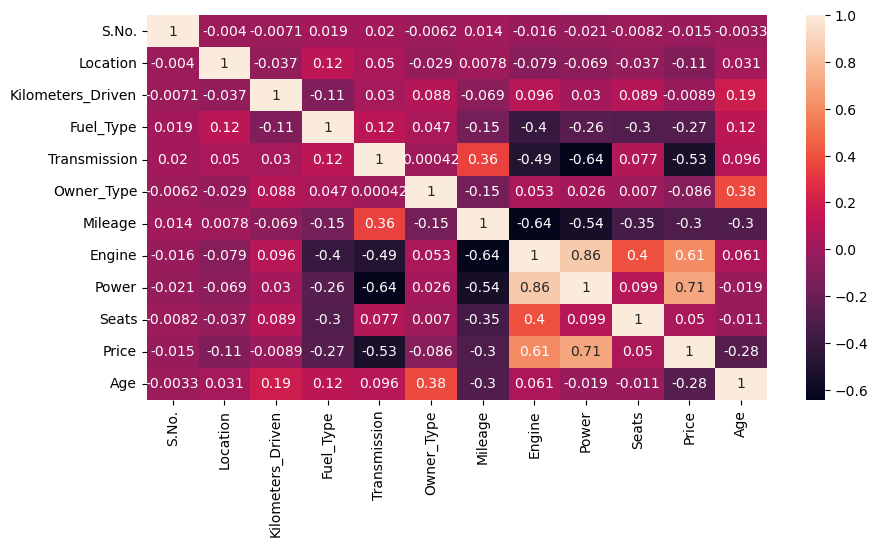

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat,annot=True)

In [44]:
# yes price is correleated with negatively with Mileage and positively with Engine and Power.
# kilo, and location were independent for old price
# only kilometr drivn have negtive effect on price of car
#fuel typ have neg corr and seats have a pos. corr with price

In [62]:
# Modelling K-Fold

In [46]:
x=df.drop(['Price','Name'],axis=1)
y=df['Price']


In [47]:
kf_model=KFold(n_splits=5,shuffle=True)

In [48]:
for i in range(1,15):
    score=cross_val_score(DecisionTreeRegressor(max_depth=i,random_state=2),x,y,cv=kf_model,scoring='neg_mean_squared_error')
    print(np.sqrt(-(score.mean())))

7.780792968676584
6.937308022301262
6.164448646852176
5.280870959121768
5.044585549129256
4.681402928978137
4.698905372476108
4.8169266260385095
4.5359563797390745
4.7469614865766685
4.75656354307463
4.987359820478306
4.7445670169705325
5.780811882126007


In [49]:
model=DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0, max_leaf_nodes=10)
for train_data, test_data in kf_model.split(df):
    train,test=df.iloc[train_data],df.iloc[test_data]
    X_train=train.drop(columns=['Price',"Name"],axis=1)
    y_train=train['Price']
    X_test=test.drop(columns=['Price',"Name"])
    y_test=test['Price']
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    print("r2:",r2_score(y_test,y_pred))
    print("Mae:", mean_absolute_error(y_test, y_pred))
    print()

rmse 5.227676612633542
r2: 0.6870949025439279
Mae: 3.0364466502158614

rmse 6.2299791312863055
r2: 0.6720977798397938
Mae: 2.748342038288914

rmse 5.728214855366959
r2: 0.6708441412433325
Mae: 3.046358908053496

rmse 4.926930682642784
r2: 0.7601132168235277
Mae: 2.985549977095201

rmse 5.482494781203501
r2: 0.7213897140414154
Mae: 3.0581778184806327



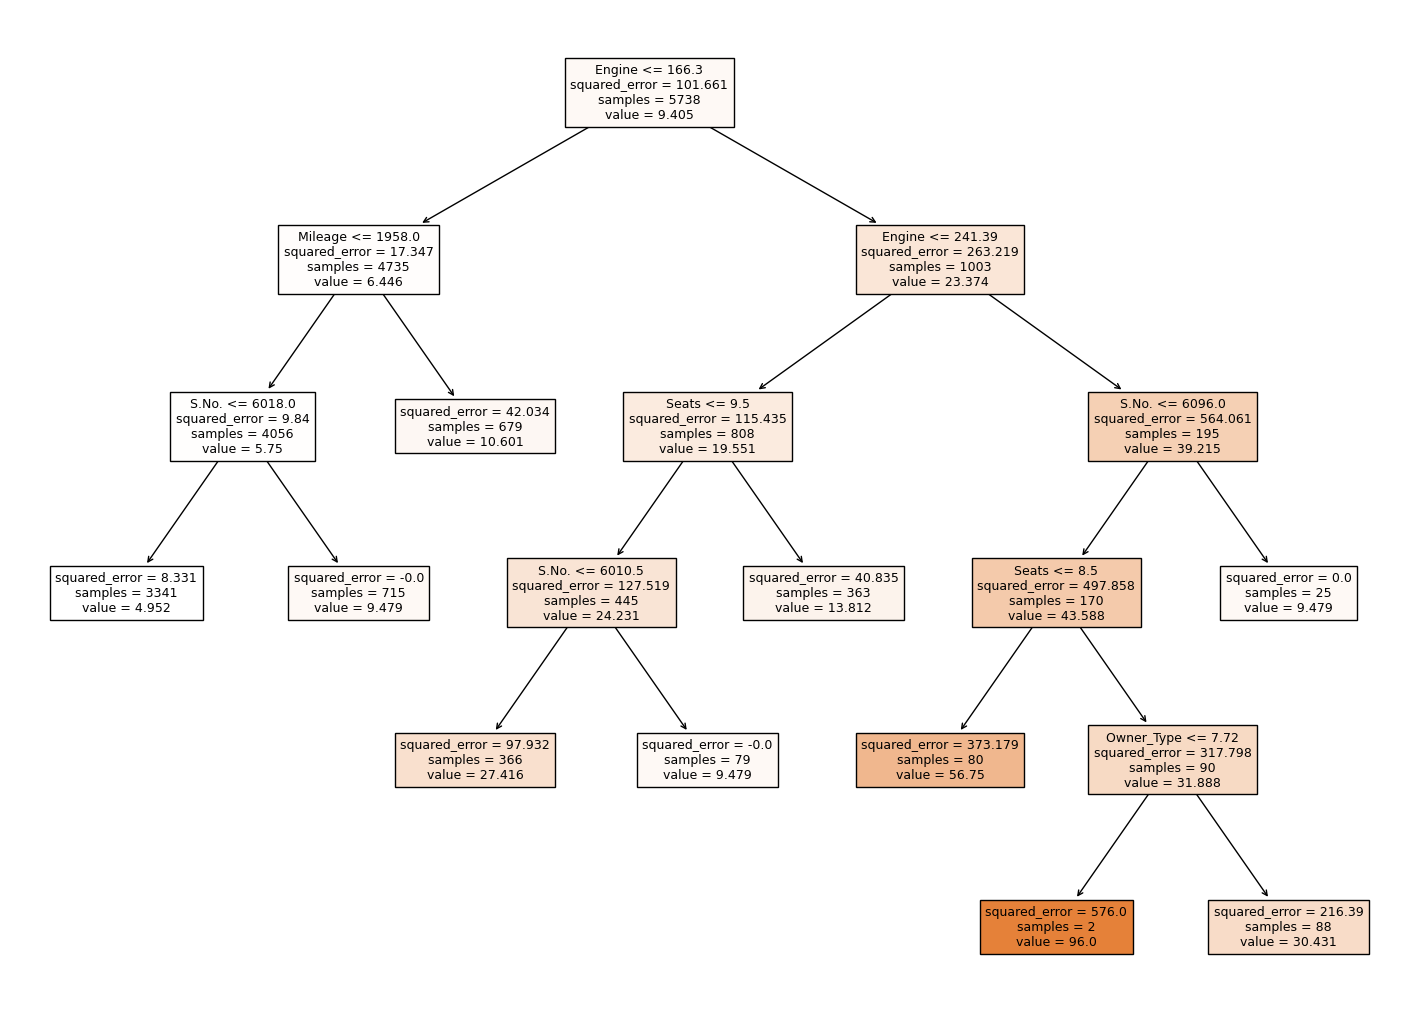

In [50]:
plt.figure(figsize=(18,13))
tree.plot_tree(model,filled=True,feature_names=df.columns,fontsize=9)
plt.show()

In [52]:
x_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
dr_model=DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
print("R_square:",dr_model.score(x_train,y_train))


R_square: 0.8055791640449068


In [54]:
y_pred =dr_model.predict(X_test)
print("rmse",mean_squared_error(y_test, y_pred, squared=False))
print("r2:",r2_score(y_test,y_pred))
print("Mae:", mean_absolute_error(y_test, y_pred))
print()

rmse 4.543650903961911
r2: 0.805719995712633
Mae: 2.329605360610184



**Linear Regression**

In [55]:
X=df.drop(['Price','Name'],axis=1)
y=df['Price']

In [56]:
x_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
lr_model=LinearRegression().fit(x_train,y_train)
print("R_square:",lr_model.score(x_train,y_train))
print("Intercept:", lr_model.intercept_)
print("slope:" ,lr_model.coef_)

R_square: 0.5779266302782593
Intercept: 14.801351528093189
slope: [-1.01790970e-05 -1.49527804e-01  2.49231966e-06 -5.80439066e-01
 -2.27267772e+00 -4.03102663e-03 -1.19737213e-01  1.22269528e-03
  9.94210472e-02 -8.44362706e-01 -8.49377642e-01]


In [58]:

y_pred = lr_model.predict(X_test)
print("rmse",mean_squared_error(y_test, y_pred, squared=False))
print("r2:",r2_score(y_test,y_pred))
print("Mae:", mean_absolute_error(y_test, y_pred))
print()

rmse 6.315430419205788
r2: 0.6246606472407289
Mae: 3.817843362234553



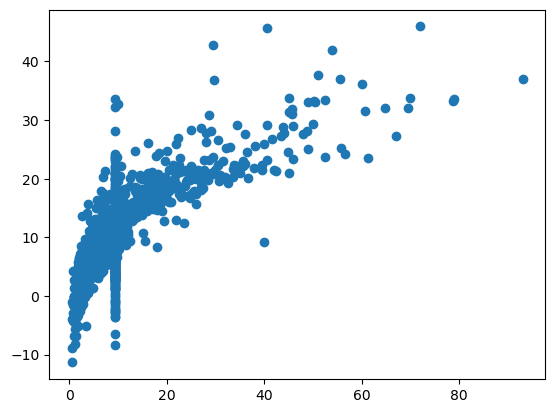

In [59]:
plt.scatter(y_test,y_pred)

**decision tree** performs better than Linear Regression.